In [0]:
import altair as alt
import numpy as np
import pandas as pd

In [0]:
# fix the maximum error
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [0]:
url='https://raw.githubusercontent.com/changsheng006/data/master/belgium_airbnb_revised20200511.csv'

In [0]:
airbnb = pd.read_csv(url)

In [0]:
airbnb.head(10)

,Unnamed: 0,id,listing_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,place
0,1,50904,https://www.airbnb.com/rooms/50904,234077,https://www.airbnb.com/users/show/234077,Karin,9/14/2010,"Antwerp, Flanders, Belgium",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/9cdb3...,https://a0.muscache.com/im/pictures/user/9cdb3...,NaN,4.0,4.0,"['email', 'phone', 'google', 'reviews', 'offli...",t,f,"Antwerp, Flanders, Belgium",NaN,Historisch Centrum,NaN,Antwerpen,Flanders,2000,Antwerp,"Antwerp, Belgium",BE,Belgium,51.21858,4.39850,t,Boutique hotel,Hotel room,2,1.0,1.0,1.0,...,25.0,1,0.0,1,60,1,2,40,60,1.3,43.3,t,6,35,65,238,3/21/2020,1,0,5/6/2015,5/6/2015,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,f,strict_14_with_grace_period,f,f,4,2,0,0,0.02,Antwerp
1,2,116134,https://www.airbnb.com/rooms/116134,586942,https://www.airbnb.com/users/show/586942,Paul,5/14/2011,"Kapellen, Flemish Region, Belgium",within an hour,100%,100%,t,https://a0.muscache.com/im/users/586942/profil...,https://a0.muscache.com/im/users/586942/profil...,NaN,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,"Antwerp, Flemish Region, Belgium",NaN,Eilandje,NaN,Antwerpen,Flemish Region,2000,Antwerp,"Antwerp, Belgium",BE,Belgium,51.23051,4.40593,t,Apartment,Entire home/apt,4,2.5,2.0,2.0,...,80.0,1,0.0,2,30,2,2,30,30,2.0,30.0,t,27,56,73,325,3/21/2020,99,23,3/5/2012,2/16/2020,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.01,Antwerp
2,3,224333,https://www.airbnb.com/rooms/224333,1167377,https://www.airbnb.com/users/show/1167377,Geert,9/16/2011,"Antwerpen, Flemish Region, Belgium",within an hour,100%,61%,t,https://a0.muscache.com/im/pictures/user/11ed8...,https://a0.muscache.com/im/pictures/user/11ed8...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'jumio', 'gover...",t,t,"Antwerpen, Vlaanderen, Belgium",NaN,Deurne Zuid West,NaN,Antwerpen,Vlaanderen,2100,Antwerp,"Antwerpen, Belgium",BE,Belgium,51.19772,4.45853,t,House,Private room,2,2.0,1.0,1.0,...,0.0,1,0.0,14,365,14,14,365,365,14.0,365.0,t,0,0,0,260,3/21/2020,1,0,9/19/2011,9/19/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,2,0,2,0,0.01,Antwerp
3,4,224682,https://www.airbnb.com/rooms/224682,1263933,https://www.airbnb.com/users/show/1263933,Kristien,10/8/2011,"Antwerpen, Vlaams Gewest, Belgium",within an hour,100%,95%,t,https://a0.muscache.com/im/pictures/user/4fe94...,https://a0.muscache.com/im/pictures/user/4fe94...,NaN,1.0,1.0,"['phone', 'reviews', 'offline_government_id', ...",t,f,"Antwerpen, Vlaams Gewest, Belgium",NaN,Sint-Andries,NaN,Antwerpen,Vlaams Gewest,2000,Antwerp,"Antwerpen, Belgium",BE,Belgium,51.21722,4.39790,t

In [0]:
list(airbnb.columns) 

In [77]:
# try to fix the problem of disconnected
%%javascript
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button").click() 
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

In [0]:
import matplotlib.pyplot as plt

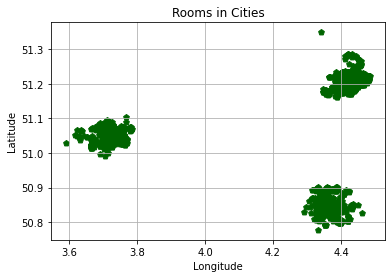

In [0]:
#plot the longitude and latitude
plt.scatter(airbnb.longitude, 
            airbnb.latitude,             
            c = 'darkgreen',             
            marker = 'p') 
plt.xlabel('Longitude') 
plt.ylabel('Latitude') 
plt.title('Rooms in Cities') 
plt.grid() 
plt.show()


In [0]:
!pip install geopandas
!pip install descartes 

import geopandas as gpd

     |████████████████████████████████| 931kB 4.5MB/s 
     |████████████████████████████████| 14.7MB 258kB/s 
     |████████████████████████████████| 10.9MB 23.4MB/s 


In [0]:
shapefile = gpd.read_file('BEL_adm3.dbf')

In [0]:
shapefile.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,23,BEL,Belgium,1,Bruxelles,1,Bruxelles,1,Brussel,Arrondissement,Arrondissement,None,Bruxelles,"POLYGON ((4.40986 50.90990, 4.41251 50.90924, ..."
1,23,BEL,Belgium,2,Vlaanderen,2,Antwerpen,2,Antwerpen,Arrondissement,Arrondissement,None,Anvers,"POLYGON ((4.53991 51.48308, 4.54448 51.47944, ..."
2,23,BEL,Belgium,2,Vlaanderen,2,Antwerpen,3,Mechelen,Arrondissement,Arrondissement,None,Malines,"POLYGON ((4.72366 51.15444, 4.72312 51.14762, ..."
3,23,BEL,Belgium,2,Vlaanderen,2,Antwerpen,4,Turnhout,Arrondissement,Arrondissement,None,None,"MULTIPOLYGON (((4.96310 51.45440, 4.96765 51.4..."
4,23,BEL,Belgium,2,Vlaanderen,3,Limburg,5,Hasselt,Arrondissement,Arrondissement,None,None,"POLYGON ((5.28395 51.12883, 5.28372 51.11697, ..."


here we try to plot the whole map of Belgium and we use decimal units in the geo data frame

In [0]:
leg_kwds = {'title':"Cities",
            'loc':'lower left',
            'ncol':3}
shapefile.plot(column = 'NAME_2',
               figsize=(16,8),
               cmap='Set3',
               legend=True,
               legend_kwds=leg_kwds)

In [0]:
# combine the location of rooms within Belgium map
leg_kwds = {'title':"Cities",
            'loc':'lower left',
            'ncol':3}
shapefile.plot(column = 'NAME_2',
               figsize=(16,8),
               cmap='Set3',
               legend=True,
               legend_kwds=leg_kwds)
plt.scatter(airbnb.longitude, 
            airbnb.latitude,             
            c = 'w',             
            marker = 'p') 
plt.title('Rooms in Cities') 
plt.grid()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [0]:
# import city data
url_bru = 'https://raw.githubusercontent.com/changsheng006/data/master/airbnb_brussel.csv'
url_ant = 'https://raw.githubusercontent.com/changsheng006/data/master/airbnb_antwerpen.csv'
url_ghe = 'https://raw.githubusercontent.com/changsheng006/data/master/airbnb_ghent.csv'

In [0]:
data_bru = pd.read_csv(url_bru)
data_ant = pd.read_csv(url_ant)
data_ghe = pd.read_csv(url_ghe)

In [0]:
# checking data
data_bru.head()

In [43]:
data_bru50 = data_bru.head(50)
data_bru50.shape

(50, 87)

In [48]:
data_bru50.head(2)

,Unnamed: 0,X,id,listing_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,place
0,2456,2475,71744,https://www.airbnb.com/rooms/71744,368362,https://www.airbnb.com/users/show/368362,Amandine,1/30/2011,"City of Brussels, Brussels, Belgium",within an hour,100%,75%,f,https://a0.muscache.com/im/pictures/user/db033...,https://a0.muscache.com/im/pictures/user/db033...,Beguinage-Dixmude,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Bruxelles, Bruxelles, Belgium",Beguinage-Dixmude,Bruxelles,NaN,Brussel,Bruxelles,1000,Brussels,"Bruxelles, Belgium",BE,Belgium,50.85427,4.34842,t,Apartment,Entire home/apt,2,1.0,1.0,...,15.0,2,15,2,1125,2,2,1125,1125,2.0,1125.0,t,0,0,0,0,4/19/2020,12,5,9/23/2017,8/12/2019,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,f,moderate,f,f,1,1,0,0,0.38,Brussels
1,2457,2482,97740,https://www.airbnb.com/rooms/97740,517059,https://www.airbnb.com/users/show/517059,Beno閸楃椂,4/18/2011,"Brussels, Bruxelles, Belgium",NaN,NaN,100%,f,https://a0.muscache.com/im/users/517059/profil...,https://a0.muscache.com/im/users/517059/profil...,Schaerbeek,2,2,"['email', 'phone', 'reviews']",t,f,"Brussels, Brussels, Belgium",Schaerbeek,Schaerbeek,NaN,Brussel,Brussels,1030,Brussels,"Brussels, Belgium",BE,Belgium,50.86986,4.37712,t,Bed and breakfast,Hotel room,4,1.0,2.0,...,0.0,1,45,2,30,2,2,1125,1125,2.0,1125.0,t,0,0,0,0,4/19/2020,3,0,1/23/2012,5/26/2016,93.0,9.0,10.0,9.0,10.0,9.0,10.0,NaN,t,f,strict_14_with_grace_period,f,f,2,0,1,0,0.03,Brussels


In [0]:
data_ant.head()

In [0]:
data_ghe.head()

In [0]:
# data transformation
from shapely.geometry import Point
data_bru['geometry'] = data_bru.apply(     
    lambda x: Point((x.longitude, x.latitude)),     
    axis = 1)
data_bru[['latitude','longitude','geometry']].head()

,latitude,longitude,geometry
0,50.85427,4.34842,POINT (4.34842 50.85427)
1,50.86986,4.37712,POINT (4.37712 50.86986)
2,50.84582,4.34954,POINT (4.34954 50.84582)
3,50.84607,4.37444,POINT (4.37444 50.84607)
4,50.84603,4.37422,POINT (4.374219999999999 50.84603)


In [40]:
!pip install geopandas

In [0]:
# Creating a GeoDataFrame from a DataFrame
import geopandas as gpd 
data_crs = {'init':  'epsg:4326'} 
bru_geo = gpd.GeoDataFrame(data_bru,                                
                           crs = data_crs,                                
                           geometry = data_bru.geometry)


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [0]:
bru_geo.head(2)

In [53]:
# brussel
import folium # construct a map centered at the Eiffel Tower 
city_bru = folium.Map(location = [50.8503,4.3517], zoom_start=18)
# display the map 
display(city_bru)

In [0]:
# building markers
for row in data_bru.iterrows():     
  row_values = row[1]     
  print(row_values)


In [54]:
#create a marker for each room 
#add the host name into the popup
for row in data_bru50.iterrows():     
  row_values = row[1]     
  location = [row_values['latitude'], row_values['longitude']]
  popup = popup = '<strong>' + row_values['host_name'] + '</strong>'      
  marker = folium.Marker(location = location,
                         icon=folium.Icon(color='red', icon='info-sign'),
                         popup = popup)     
  marker.add_to(city_bru)
display(city_bru)

In [0]:
# antwerp
city_ant = folium.Map(location = [51.2194,4.4025], zoom_start=12)
# display the map 
display(city_ant)

In [0]:
# ghent
city_ghe = folium.Map(location = [51.0543,3.7174], zoom_start=12)
# display the map 
display(city_ghe)

idea: 
1. the county map graph: summarize the information about cities. Using belgium folium and making three markers of three cities, when clicking on the marker of city, the popup may show the vega graph of those information

2. the city graph: add location of rooms on the map
show the information in the popups: like price,number of reviews, the highest rating with large size of markers

Tomorrow, the second one can be finished firstly and the first one can be finished later. 20200513

In [97]:
# country map
# Belgium
import folium # construct a map centered at the Eiffel Tower 
country = folium.Map(location = [50.5039,4.4699], zoom_start=8)
# display the map 
display(country)


In [0]:
# create an altair chart, then convert to JSON
price_roomtype_bru = alt.Chart(data_bru).mark_bar(
  size=40,
  cornerRadiusTopLeft=3,
  cornerRadiusTopRight=3
  ).encode(
  x=alt.X('room_type:N',title='Room Type'),
  y=alt.Y('mean(price):Q',title='Average Price'),
  color='room_type:N'
  ).properties(
    height=200,
    width=300,
    title='Average price of different room types'
  ).configure_legend(
  orient='top-right')

price_roomtype_ant = alt.Chart(data_ant).mark_bar(
  size=40,
  cornerRadiusTopLeft=3,
  cornerRadiusTopRight=3
  ).encode(
  x=alt.X('room_type:N',title='Room Type'),
  y=alt.Y('mean(price):Q',title='Average Price'),
  color='room_type:N'
  ).properties(
    height=200,
    width=300,
    title='Average price of different room types'
  ).configure_legend(
  orient='top-right')

price_roomtype_ghe = alt.Chart(data_ghe).mark_bar(
  size=40,
  cornerRadiusTopLeft=3,
  cornerRadiusTopRight=3
  ).encode(
  x=alt.X('room_type:N',title='Room Type'),
  y=alt.Y('mean(price):Q',title='Average Price'),
  color='room_type:N'
  ).properties(
    height=200,
    width=300,
    title='Average price of different room types'
  ).configure_legend(
  orient='top-left')


bru_popup = price_roomtype_bru.to_json()
ant_popup = price_roomtype_ant.to_json()
ghe_popup = price_roomtype_ghe.to_json()

In [0]:
# create a marker, with altair graphic as popup
circ_mkr_bru = folium.CircleMarker(
    location = [50.8503,4.3517],
    radius=20,
    color='red',
    fill=True,
    fill_color='red',
    fillOpacity=1.0,
    opacity=1.0,
    tooltip='Altair Graph',
    popup=folium.Popup(max_width=400).add_child(folium.VegaLite(bru_popup, width=400, height=300)),
)

circ_mkr_ant = folium.CircleMarker(
    location = [51.2194,4.4025],
    radius=20,
    color='blue',
    fill=True,
    fill_color='blue',
    fillOpacity=1.0,
    opacity=1.0,
    tooltip='Altair Graph',
    popup=folium.Popup(max_width=400).add_child(folium.VegaLite(ant_popup, width=400, height=300)),
)

circ_mkr_ghe = folium.CircleMarker(
    location = [51.0543,3.7174],
    radius=20,
    color='yellow',
    fill=True,
    fill_color='yellow',
    fillOpacity=1.0,
    opacity=1.0,
    tooltip='Altair Graph',
    popup=folium.Popup(max_width=400).add_child(folium.VegaLite(ghe_popup, width=400, height=300)),
)

In [100]:
# add to map
circ_mkr_bru.add_to(country)
circ_mkr_ant.add_to(country)
circ_mkr_ghe.add_to(country)

country

Output hidden; open in https://colab.research.google.com to view.

next target is to figure out the size of markers, like allow the size of markers to be dependended on some variables, like price